In [290]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Reading Game_details csv file

In [291]:
df = pd.read_csv ('games_details.csv', index_col=0, delimiter=',', encoding='latin-1')
df


C:\Users\camil\AppData\Local\Temp\ipykernel_6076\296774311.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('games_details.csv', index_col=0, delimiter=',', encoding='latin-1')


,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
GAME_ID,,,,,,,,,,,,,,,,,,,,,
22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,1.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,2.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,9.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,9.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN


Joining Games and Game_details table (getting SEASON from the GAME_ID)

In [292]:
df2 = pd.read_csv ('games.csv', index_col=0, delimiter=',', encoding='latin-1')
df2 = df2.get(['SEASON','GAME_ID'])
df = df.merge(df2, how= 'right', on='GAME_ID')
df.head()
#df1 = df[['GAME_DATE_EST']]
#df1

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
0,22100213,1.610613e+09,WAS,Washington,203484.0,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0,2021
1,22100213,1.610613e+09,WAS,Washington,1628398.0,Kyle Kuzma,Kyle,F,NaN,30:28,...,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0,2021
2,22100213,1.610613e+09,WAS,Washington,1629655.0,Daniel Gafford,Daniel,C,NaN,24:21,...,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0,2021
3,22100213,1.610613e+09,WAS,Washington,203078.0,Bradley Beal,Bradley,G,NaN,35:07,...,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0,2021
4,22100213,1.610613e+09,WAS,Washington,203915.0,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0,2021


Center position Field Goal Analysis by Season < 2019 (2020 COVID-19 Season)

In [293]:
dff = df.groupby(["START_POSITION","SEASON"]).agg(FG3M_=('FG3M','sum'),FG3A_=('FG3A','sum')).reset_index()
dff["FG3_%"] = dff["FG3M_"].div(dff["FG3A_"].values)
dff=dff.loc[dff['START_POSITION'] == 'C']
dff=dff.loc[dff['SEASON'] < 2020]
dff

,START_POSITION,SEASON,FG3M_,FG3A_,FG3_%
0,C,2003,139.0,432.0,0.321759
1,C,2004,110.0,367.0,0.299728
2,C,2005,113.0,354.0,0.319209
3,C,2006,245.0,730.0,0.335616
4,C,2007,472.0,1359.0,0.347314
5,C,2008,446.0,1168.0,0.381849
6,C,2009,388.0,1089.0,0.356290
7,C,2010,138.0,426.0,0.323944
8,C,2011,99.0,326.0,0.303681
9,C,2012,94.0,340.0,0.276471


Some fast conclusions:
* After 2012 Centers started to take more 3 pointer shots

Text(0.5, 0, 'SEASON')

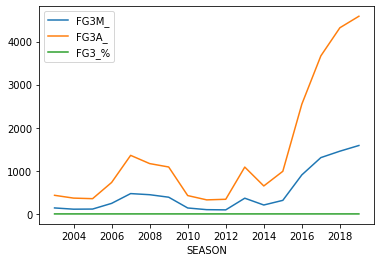

In [294]:
dff.plot(kind='line',x='SEASON')
plt.xlabel('SEASON')

Analyzing Center position 3 point metrics by season and team

In [295]:
dff2 = df.groupby(["START_POSITION","SEASON","TEAM_ID","TEAM_ABBREVIATION"]).agg(FG3M_=('FG3M','sum'),FG3A_=('FG3A','sum')).reset_index()
dff2 = dff2.loc[dff2['START_POSITION'] == 'C']
dff2["FG3_%"] = dff2["FG3M_"].div(dff2["FG3A_"].values)
dff2["TEAM_ID"] = dff2["TEAM_ID"].astype(int)
dff2

,START_POSITION,SEASON,TEAM_ID,TEAM_ABBREVIATION,FG3M_,FG3A_,FG3_%
0,C,2003,1610612737,ATL,1.0,3.0,0.333333
1,C,2003,1610612738,BOS,22.0,37.0,0.594595
2,C,2003,1610612739,CLE,2.0,7.0,0.285714
3,C,2003,1610612740,NOH,0.0,2.0,0.000000
4,C,2003,1610612741,CHI,2.0,6.0,0.333333
...,...,...,...,...,...,...,...
564,C,2021,1610612762,UTA,1.0,6.0,0.166667
565,C,2021,1610612763,MEM,0.0,3.0,0.000000
566,C,2021,1610612764,WAS,1.0,5.0,0.200000
567,C,2021,1610612765,DET,2.0,13.0,0.153846


Getting Final Standings (W-L) by team and season

In [296]:
df_rank = pd.read_csv ('ranking.csv', index_col=0, delimiter=',', encoding='latin-1')
df_rank['PRESEASON'] = df_rank['SEASON_ID'].astype(str).str[0]
df_rank['SEASON'] = df_rank['SEASON_ID'].astype(str).str[1:]
df_rank['SEASON'] = df_rank['SEASON'].astype(int)
df_rank = df_rank.loc[df_rank['PRESEASON'] == '2']
df_rank = df_rank.loc[df_rank['SEASON'] < 2020]
df_rank = df_rank.groupby(["TEAM_ID","SEASON"]).agg(FINAL_STANDINGS_DATE=('STANDINGSDATE','max'),FINAL_W=('W','max'),FINAL_L=('L','max')).reset_index()
df_rank["FINAL_W_PCT"] = df_rank["FINAL_W"]/(df_rank["FINAL_W"]+df_rank["FINAL_L"])
df_rank['TEAM_SEASON'] = df_rank["TEAM_ID"].astype(str)+df_rank["SEASON"].astype(str)
df_rank

,TEAM_ID,SEASON,FINAL_STANDINGS_DATE,FINAL_W,FINAL_L,FINAL_W_PCT,TEAM_SEASON
0,1610612737,2002,2003-10-04,35,47,0.426829,16106127372002
1,1610612737,2003,2004-10-11,28,54,0.341463,16106127372003
2,1610612737,2004,2005-10-09,13,69,0.158537,16106127372004
3,1610612737,2005,2006-10-04,26,56,0.317073,16106127372005
4,1610612737,2006,2007-10-05,30,52,0.365854,16106127372006
...,...,...,...,...,...,...,...
533,1610612766,2015,2016-09-30,48,34,0.585366,16106127662015
534,1610612766,2016,2017-09-29,36,46,0.439024,16106127662016
535,1610612766,2017,2018-09-27,36,46,0.439024,16106127662017
536,1610612766,2018,2019-09-29,39,43,0.475610,16106127662018


Concatenating TEAM_ID and SEASON to merge dataframes (W-L df with Center #Pt metrics df) 

In [297]:
dff2["TEAM_SEASON"] = dff2["TEAM_ID"].astype(str)+dff2["SEASON"].astype(str)


Merging the datasets (Team standings End of Season with Center 3 pointer metrics by season and team)

In [298]:
dff2 = dff2.get(['TEAM_SEASON','FG3M_','FG3A_','FG3_%'])
df_rank = df_rank.merge(dff2, on='TEAM_SEASON',  how= 'inner')
df_rank

,TEAM_ID,SEASON,FINAL_STANDINGS_DATE,FINAL_W,FINAL_L,FINAL_W_PCT,TEAM_SEASON,FG3M_,FG3A_,FG3_%
0,1610612737,2003,2004-10-11,28,54,0.341463,16106127372003,1.0,3.0,0.333333
1,1610612737,2004,2005-10-09,13,69,0.158537,16106127372004,12.0,25.0,0.480000
2,1610612737,2005,2006-10-04,26,56,0.317073,16106127372005,0.0,2.0,0.000000
3,1610612737,2006,2007-10-05,30,52,0.365854,16106127372006,0.0,1.0,0.000000
4,1610612737,2007,2008-10-04,37,45,0.451220,16106127372007,0.0,5.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
504,1610612766,2015,2016-09-30,48,34,0.585366,16106127662015,13.0,30.0,0.433333
505,1610612766,2016,2017-09-29,36,46,0.439024,16106127662016,27.0,69.0,0.391304
506,1610612766,2017,2018-09-27,36,46,0.439024,16106127662017,1.0,9.0,0.111111
507,1610612766,2018,2019-09-29,39,43,0.475610,16106127662018,10.0,28.0,0.357143


Getting the correlation matrix and plot by season (3pt% and win %)
* Quick conclusion: 2019 has a positive correlation between 3pt% and final win %), the rest of the seasons show no correlation at all. 
* That means we can´t assume that if we have high 3pt% from the centers in a team will impact win% positively.

SEASON       
2003    FG3_%   -0.000375
2004    FG3_%   -0.347473
2005    FG3_%    0.080769
2006    FG3_%   -0.200077
2007    FG3_%   -0.150642
2008    FG3_%    0.185481
2009    FG3_%    0.215695
2010    FG3_%    0.085511
2011    FG3_%    0.048771
2012    FG3_%    0.017760
2013    FG3_%    0.044173
2014    FG3_%   -0.045930
2015    FG3_%   -0.007831
2016    FG3_%   -0.378768
2017    FG3_%   -0.132847
2018    FG3_%   -0.093697
2019    FG3_%    0.405240
Name: FINAL_W_PCT, dtype: float64


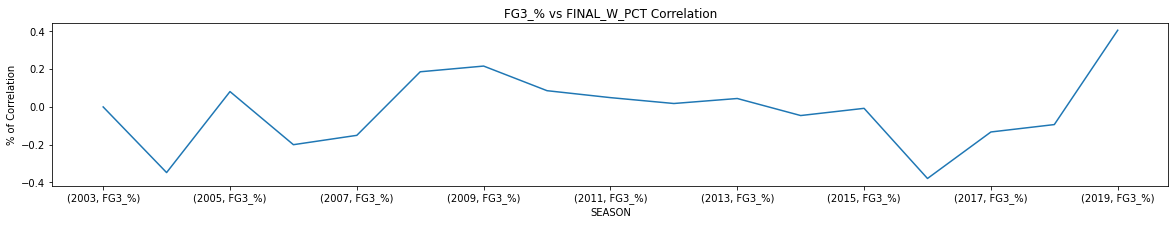

In [299]:
df_corr_3_PERC = df_rank.groupby('SEASON')[['FINAL_W_PCT','FG3_%']].corr()#.iloc[0::2,-1]
df_corr_3_PERC = df_corr_3_PERC.loc[df_corr_3_PERC['FINAL_W_PCT'] != 1]
df_corr_3_PERC = df_corr_3_PERC['FINAL_W_PCT']
df_corr_3_PERC
ax = df_corr_3_PERC.plot(figsize=(20,3))
ax.set_xlabel("SEASON")
ax.set_ylabel("% of Correlation")
ax.set_title("FG3_% vs FINAL_W_PCT Correlation")
print(df_corr_3_PERC)

Getting the correlation matrix by season (3pts made and win %)
* Same conclusion as the FG3%

SEASON       
2003    FG3M_    0.190210
2004    FG3M_   -0.066551
2005    FG3M_   -0.026401
2006    FG3M_    0.123737
2007    FG3M_    0.260755
2008    FG3M_    0.026680
2009    FG3M_    0.144722
2010    FG3M_   -0.266083
2011    FG3M_   -0.278924
2012    FG3M_    0.316949
2013    FG3M_   -0.157312
2014    FG3M_    0.033283
2015    FG3M_    0.020316
2016    FG3M_   -0.298331
2017    FG3M_   -0.047794
2018    FG3M_    0.238317
2019    FG3M_    0.294730
Name: FINAL_W_PCT, dtype: float64


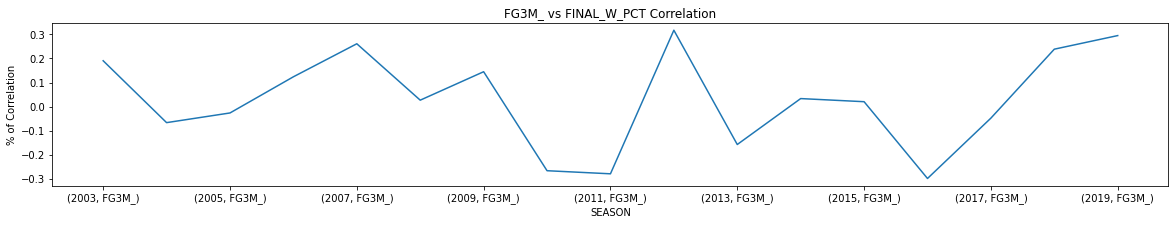

In [300]:
df_corr_3_M = df_rank.groupby('SEASON')[['FINAL_W_PCT','FG3M_']].corr()#.iloc[0::2,-1]
df_corr_3_M = df_corr_3_M.loc[df_corr_3_M['FINAL_W_PCT'] < .99999]
df_corr_3_M = df_corr_3_M['FINAL_W_PCT']
ax = df_corr_3_M.plot(figsize=(20,3))
ax.set_xlabel("SEASON")
ax.set_ylabel("% of Correlation")
ax.set_title("FG3M_ vs FINAL_W_PCT Correlation")
print(df_corr_3_M)

Creating FG (from 2 pt range) metrics to compare vs. FG 3 pointer metrics

In [301]:
df['FG2A_'] = df['FGA']-df['FG3A']
df['FG2M_'] = df['FGM']-df['FG3M']

3pt metrics vs 2 pt metrics by season (analyzing trends)
  * Trend spotted:
      1. 3 pointers attempted have increased almost year by year since the 2012 season (56K to 83K), meanwhile 2 pointers are decreasing slowly since then (175K to 135K). This can also be seen by the per game metrics: 3pt attempts per game (43 to 68) and 2pt attempts per game (122 to 108).
      2. 2 pointer shots percentage made has increased from 2013 till 2019 (48% to 52%), meanwhile 3 pointers remain at the 36% range

    SEASON    FG3M_    FG3A_    FG2M_     FG2A_  GAMES_PLAYED     FG3_%  \
0     2003  13245.0  38349.0  76243.0  166192.0          1385  0.345381   
1     2004  15219.0  42879.0  82220.0  175045.0          1362  0.354929   
2     2005  16241.0  45568.0  85775.0  179650.0          1432  0.356412   
3     2006  17082.0  48015.0  85772.0  177169.0          1419  0.355764   
4     2007  18263.0  50614.0  85913.0  178287.0          1411  0.360829   
5     2008  18797.0  51500.0  85994.0  177867.0          1425  0.364990   
6     2009  18230.0  51580.0  88149.0  179742.0          1424  0.353432   
7     2010  18264.0  51186.0  86509.0  178544.0          1422  0.356816   
8     2011  14028.0  40464.0  65979.0  138666.0          1104  0.346679   
9     2012  20251.0  56766.0  84419.0  175426.0          1420  0.356745   
10    2013  22020.0  61492.0  84661.0  174263.0          1427  0.358095   
11    2014  22337.0  63972.0  83469.0  172381.0          1418  0.349168   
12    2015  24179.0  6866

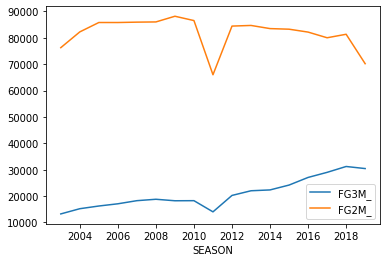

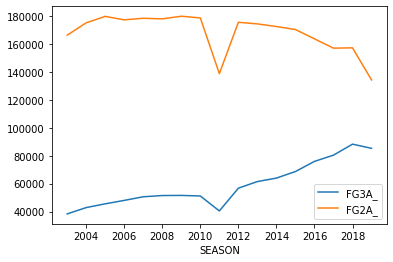

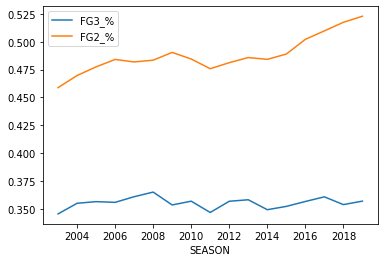

In [325]:
df3 = df.groupby(["SEASON"]).agg(FG3M_=('FG3M','sum'),FG3A_=('FG3A','sum'),FG2M_=('FG2M_','sum'),FG2A_=('FG2A_','sum'),GAMES_PLAYED=('GAME_ID','nunique')).reset_index()
df3 = df3.loc[df3['SEASON'] < 2020]
df3['FG3_%'] = df3['FG3M_']/df3['FG3A_']
df3['FG2_%'] = df3['FG2M_']/df3['FG2A_']
df3['FG2A_GAME'] = df3['FG2A_']/df3['GAMES_PLAYED']
df3['FG3A_GAME'] = df3['FG3A_']/df3['GAMES_PLAYED']
df3.plot(x='SEASON',y=['FG3M_','FG2M_'])
df3.plot(x='SEASON',y=['FG3A_','FG2A_'])
df3.plot(x='SEASON',y=['FG3_%','FG2_%'])
print(df3)

3 point and 2 point FG metrics % of change by NBA Season 
* Conclusions:
    1. Both 3 pt and 2 pt attempts increased massively from 2011 to 2012 seasons (). That´s because the 2011 season had 300 less games due to the NBA lockout by players, since then the 3 pt attempts mantained a positive % change till the 2018 season, meanwhile the 2 pt attempts decreased each year in the same timeframe.

           FG3M_     FG3A_     FG2M_     FG2A_     FG3_%     FG2_%
SEASON                                                            
2003         NaN       NaN       NaN       NaN       NaN       NaN
2004    0.149037  0.118126  0.078394  0.053270  0.027646  0.023854
2005    0.067153  0.062711  0.043238  0.026308  0.004179  0.016496
2006    0.051783  0.053700 -0.000035 -0.013810 -0.001820  0.013968
2007    0.069137  0.054129  0.001644  0.006310  0.014238 -0.004637
2008    0.029239  0.017505  0.000943 -0.002356  0.011533  0.003306
2009   -0.030164  0.001553  0.025060  0.010542 -0.031669  0.014367
2010    0.001865 -0.007639 -0.018605 -0.006665  0.009577 -0.012020
2011   -0.231932 -0.209471 -0.237316 -0.223351 -0.028412 -0.017981
2012    0.443613  0.402877  0.279483  0.265097  0.029038  0.011371
2013    0.087354  0.083254  0.002867 -0.006630  0.003785  0.009560
2014    0.014396  0.040330 -0.014080 -0.010800 -0.024929 -0.003316
2015    0.082464  0.073345 -0.002744 -0.012414  0.008496  0.00

<AxesSubplot:title={'center':'FG2A_ and FG3A_ % change by season'}, xlabel='SEASON', ylabel='%change'>

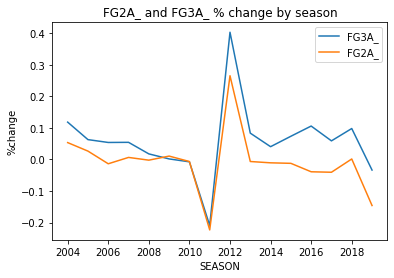

In [303]:
df4 = df3.set_index(['SEASON'])
df4 = df4.pct_change()
print(df4)
df4.plot(y=['FG3A_','FG2A_'], title="FG2A_ and FG3A_ % change by season", ylabel= "%change")

   TEAM_ABBREVIATION   FG3A_   FG2A_  FG3A_PERC  FG3A_PERC_ACUM
19               NYK  2833.0  5305.0   0.049907        0.049907
10               HOU  2750.0  5114.0   0.048444        0.098351
15               MIA  2468.0  6251.0   0.043477        0.141828
26               SAS  2337.0  6545.0   0.041169        0.182997
13               LAL  2231.0  5290.0   0.039302        0.222299
0                ATL  2167.0  5530.0   0.038174        0.260473
24               POR  2080.0  5195.0   0.036642        0.297114
11               IND  2064.0  6441.0   0.036360        0.333474
1                BKN  2038.0  5588.0   0.035902        0.369376
9                GSW  2026.0  6366.0   0.035690        0.405066
20               OKC  1999.0  5986.0   0.035215        0.440281
12               LAC  1988.0  5702.0   0.035021        0.475302
16               MIL  1932.0  6259.0   0.034034        0.509337
25               SAC  1823.0  5666.0   0.032114        0.541451
27               TOR  1803.0  5366.0   0

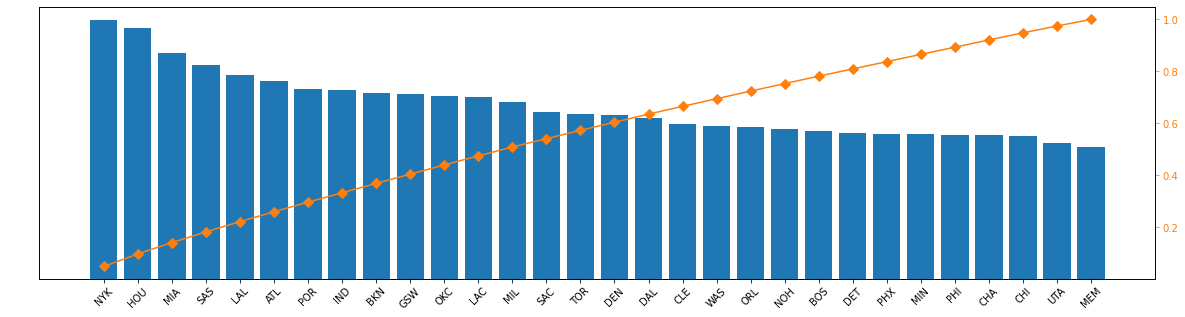

In [304]:
df5 = df.loc[df['SEASON'] == 2012]
df5 = df5.groupby(["TEAM_ABBREVIATION"]).agg(FG3A_=('FG3A','sum'),FG2A_=('FG2A_','sum')).reset_index()
df5 = df5.sort_values(by='FG3A_', ascending=False)
df5['FG3A_'] = df5['FG3A_'].astype(float)
df5['FG3A_PERC'] = (df5['FG3A_'] / df5['FG3A_'].sum())
df5["FG3A_PERC_ACUM"]=df5["FG3A_PERC"].cumsum()
print(df5)

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(df5["TEAM_ABBREVIATION"], df5['FG3A_'], color="C0")
ax2 = ax.twinx()
ax2.plot(df5["TEAM_ABBREVIATION"], df5["FG3A_PERC_ACUM"], color="C1", marker="D", ms=7)
ax.tick_params(axis="y", colors="white")
ax2.tick_params(axis="y", colors="C1")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()


In [305]:
df6 = df.loc[df['SEASON'] == 2012]
df6 = df6.groupby(["PLAYER_NAME"]).agg(FG3A_=('FG3A','sum'),FG2A_=('FG2A_','sum')).reset_index()
df6 = df6.sort_values(by='FG3A_', ascending=False)
df6['FG3A_'] = df6['FG3A_'].astype(float)
df6['FG3A_PERC'] = (df6['FG3A_'] / df6['FG3A_'].sum())
df6["FG3A_PERC_ACUM"]=df6["FG3A_PERC"].cumsum()
df6 = df6[0:25]
#df6 = df6.style.set_caption("Top 50 players by FGA3 (2012) Season")
df6

,PLAYER_NAME,FG3A_,FG2A_,FG3A_PERC,FG3A_PERC_ACUM
488,Stephen Curry,716.0,941.0,0.012613,0.012613
321,Klay Thompson,622.0,840.0,0.010957,0.023570
470,Ryan Anderson,608.0,588.0,0.010711,0.034281
429,Paul George,598.0,947.0,0.010534,0.044816
112,Danny Green,560.0,334.0,0.009865,0.054681
226,James Harden,550.0,958.0,0.009689,0.064370
105,Damian Lillard,536.0,824.0,0.009442,0.073812
53,Brandon Jennings,529.0,873.0,0.009319,0.083131
135,Deron Williams,515.0,782.0,0.009072,0.092203
217,JR Smith,503.0,920.0,0.008861,0.101064


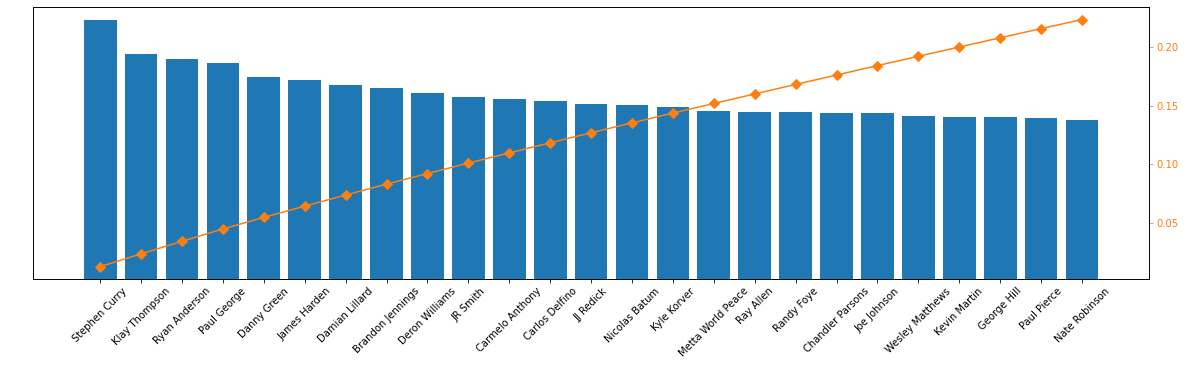

In [306]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(df6["PLAYER_NAME"], df6['FG3A_'], color="C0")
ax2 = ax.twinx()
ax2.plot(df6["PLAYER_NAME"], df6["FG3A_PERC_ACUM"], color="C1", marker="D", ms=7)
ax.tick_params(axis="y", colors="white")
ax2.tick_params(axis="y", colors="C1")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

Top 10 players with most 3pt FG Attempts since 2012 till 2019

         PLAYER_NAME   FG3A_   FG2A_  SEASONS_PLAYED  GAMES_PLAYED  \
618     James Harden  6649.0  7742.0               8           763   
1326   Stephen Curry  6345.0  5797.0               8           691   
286   Damian Lillard  5460.0  7387.0               8           731   
871    Klay Thompson  5170.0  6486.0               8           733   
1160     Paul George  4502.0  6316.0               8           656   
893       Kyle Lowry  4389.0  4420.0               8           698   
839     Kemba Walker  4196.0  6848.0               8           692   
578        JJ Redick  3992.0  3581.0               8           702   
1416    Trevor Ariza  3883.0  2623.0               8           722   
459      Eric Gordon  3840.0  3281.0               8           608   

      FG3A_PER_SESASON  FG3A_PER_GAME  
618            831.125       8.714286  
1326           793.125       9.182344  
286            682.500       7.469220  
871            646.250       7.053206  
1160           562.750       

<AxesSubplot:title={'center':'Top 10 FG3A_PER_GAME (2012-2019)'}, xlabel='PLAYER_NAME'>

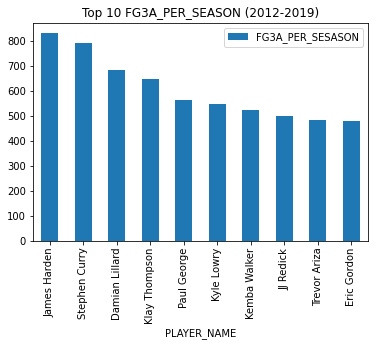

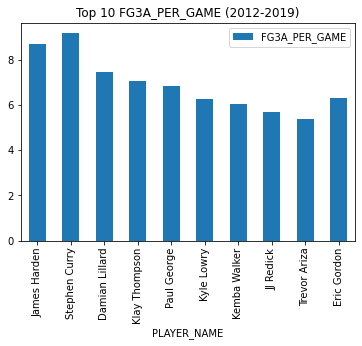

In [322]:
df7 = df.loc[df['SEASON'] >= 2012]
df7 = df7.loc[df['SEASON'] < 2020]
df7 = df7.groupby(["PLAYER_NAME"]).agg(FG3A_=('FG3A','sum'),FG2A_=('FG2A_','sum'),SEASONS_PLAYED=('SEASON','nunique'),GAMES_PLAYED=('GAME_ID','nunique')).reset_index()
df7 = df7.sort_values(by='FG3A_', ascending=False)
df7['FG3A_'] = df7['FG3A_'].astype(float)
df7['FG3A_PER_SESASON'] = (df7['FG3A_'] / df7['SEASONS_PLAYED'])
df7['FG3A_PER_GAME'] = (df7['FG3A_'] / df7['GAMES_PLAYED'])
df7 = df7[0:10]
print(df7)
df7.plot.bar(x="PLAYER_NAME",y="FG3A_PER_SESASON",title="Top 10 FG3A_PER_SEASON (2012-2019)")
df7.plot.bar(x="PLAYER_NAME",y="FG3A_PER_GAME",title="Top 10 FG3A_PER_GAME (2012-2019)")